<a href="https://colab.research.google.com/github/mrasifimran/Machine-Learning/blob/main/sports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d gpiosenka/sports-classification

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sports-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [ ]:
train_datagen = tf.keras.preprocessing.image_dataset_from_directory(
                                                '/content/train',
                                                labels="inferred",
                                                label_mode="int",
                                                color_mode="rgb",
                                                batch_size=32,
                                                image_size=(256, 256))
test_datagen = tf.keras.preprocessing.image_dataset_from_directory(
                                                '/content/test',
                                                labels="inferred",
                                                label_mode="int",
                                                color_mode="rgb",
                                                batch_size=32,
                                                image_size=(256, 256))

Found 13572 files belonging to 100 classes.
Found 500 files belonging to 100 classes.


In [ ]:
def image_processor(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label

train_datagen = train_datagen.map(image_processor)
test_datagen = test_datagen.map(image_processor)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(100,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 128)     

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history = model.fit(train_datagen,epochs=5,validation_data=test_datagen)

Epoch 1/5
425/425 [==============================] - 33s 72ms/step - loss: 4.2240 - accuracy: 0.0513 - val_loss: 3.6401 - val_accuracy: 0.1380
Epoch 2/5
425/425 [==============================] - 30s 70ms/step - loss: 3.3567 - accuracy: 0.1779 - val_loss: 2.9169 - val_accuracy: 0.2320
Epoch 3/5
425/425 [==============================] - 31s 73ms/step - loss: 2.5584 - accuracy: 0.3410 - val_loss: 2.7564 - val_accuracy: 0.3180
Epoch 4/5
425/425 [==============================] - 30s 70ms/step - loss: 1.7193 - accuracy: 0.5362 - val_loss: 3.1808 - val_accuracy: 0.3160
Epoch 5/5
425/425 [==============================] - 30s 70ms/step - loss: 1.0035 - accuracy: 0.7191 - val_loss: 4.0549 - val_accuracy: 0.3020


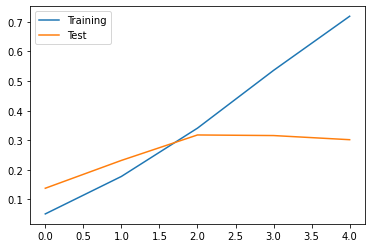

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label="Training")
plt.plot(history.history['val_accuracy'], label="Test")
plt.legend()
plt.show()

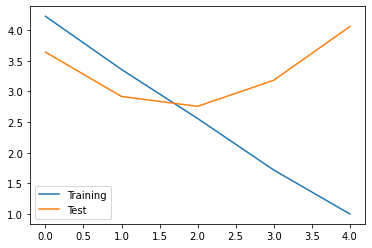

In [ ]:
plt.plot(history.history['loss'],label="Training")
plt.plot(history.history['val_loss'], label="Test")
plt.legend()
plt.show()

In [ ]:
from keras.layers import BatchNormalization,Dropout

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))

model2.add(Flatten())
model2.add(Dense(128,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dropout(0.2))
model2.add(Dense(64,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.03)))
model2.add(Dropout(0.1))
model2.add(Dense(100,activation='softmax'))

In [ ]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
history2 = model2.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
425/425 [==============================] - 44s 95ms/step - loss: 9.8344 - accuracy: 0.0116 - val_loss: 5.7388 - val_accuracy: 0.0120
Epoch 2/10
425/425 [==============================] - 40s 94ms/step - loss: 5.8536 - accuracy: 0.0214 - val_loss: 5.5518 - val_accuracy: 0.0360
Epoch 3/10
425/425 [==============================] - 40s 93ms/step - loss: 5.4614 - accuracy: 0.0331 - val_loss: 5.3852 - val_accuracy: 0.0560
Epoch 4/10
425/425 [==============================] - 40s 94ms/step - loss: 5.3132 - accuracy: 0.0599 - val_loss: 5.3034 - val_accuracy: 0.0620
Epoch 5/10
425/425 [==============================] - 40s 93ms/step - loss: 5.0784 - accuracy: 0.0886 - val_loss: 4.9119 - val_accuracy: 0.1080
Epoch 6/10
425/425 [==============================] - 40s 94ms/step - loss: 5.0744 - accuracy: 0.1067 - val_loss: 4.8863 - val_accuracy: 0.1220
Epoch 7/10
425/425 [==============================] - 40s 93ms/step - loss: 5.2206 - accuracy: 0.1184 - val_loss: 5.2495 - val_accuracy: